In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
# The following line will be problematic for other users
# It will have to be changed to a location on YOUR drive, probably in "Shared with Me"
# or similar

In [ ]:
# 
#cd drive/MyDrive/'MacAI BraTS samples'

In [18]:
import nibabel as nb
import os 
from multiprocessing.dummy import Pool as ThreadPool
import numpy as np
from time import time
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv3D, MaxPooling3D, AveragePooling3D

In [3]:
training_parent = 'sample_data' #'BraTS2020_TrainingData/MICCAI_BrATS2020_TrainingData'

In [4]:
def load_img(path):
    this_ext = nb.load(path).get_fdata()
    this_ext = np.expand_dims(this_ext, axis=-1)
    return this_ext

def subfolder_load(subfolder):
    """
    Function for loading a subfolder of the BraTS20 training data.
    Args:
        subfolder (str): Path to subfolder with an additional "BraTS20_Training_XXX" for attaching file extensions 
    Returns:
        np.ndarray
    """
    pool = ThreadPool(5)
    paths = [subfolder + ext for ext in ['_t1.nii', '_flair.nii', '_t1ce.nii', '_t2.nii', '_seg.nii']]
    loaded_data = pool.map(load_img, paths)
    return np.transpose(loaded_data, [4, 1, 2, 3, 0])




In [5]:
# This part of the code is not threaded as converting from list (normally outputted by pool.map) to np.ndarray is memory-intensive
# There's probably a way to do this without this issue outside of the multiprocessing library

t = time()
images = None
subfolders = [os.path.join(training_parent, child, child)  for child in os.listdir(training_parent)][:10]
for file_target in subfolders:
    if images is None:
        images = subfolder_load(file_target)
    else:
        images = np.concatenate([images, subfolder_load(file_target)], axis=0)

print('Loading time: ' + str(np.round(time()-t)))

Loading time: 99.0


In [28]:

model = Sequential()
model.add(AveragePooling3D(input_shape = (images.shape[1], images.shape[2], images.shape[3], images.shape[4])))

pooled_images = model.predict(images)

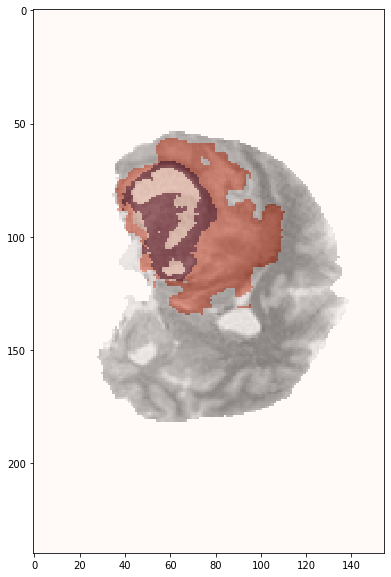

In [29]:
plt.figure(figsize=(20, 10))
plt.imshow(images[0, :, 120, :, 0], cmap='Greys')
plt.imshow(images[0, :, 120, :, -1], cmap='Reds', alpha=0.5)

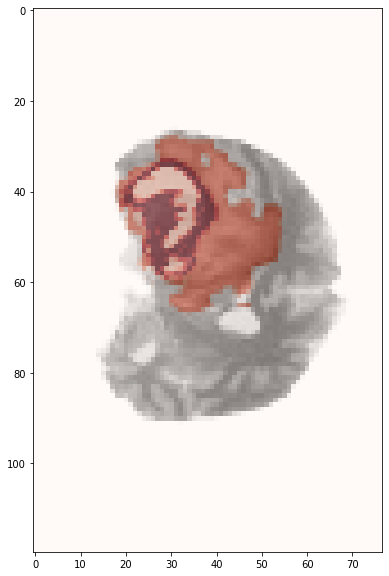

In [35]:
# Just a rough example to show that doing operations in Keras works. Not meant for any real purpose
# for example, the average-pooled mask doesn't make any sense 
plt.figure(figsize=(20, 10))
plt.imshow(pooled_images[0, :, 60, :, 0], cmap='Greys')
plt.imshow(pooled_images[0, :, 60, :, -1], cmap='Reds', alpha=0.5)
